<h2 style="text-align: left; color: red;">Librerías importadas</h2>

A continuación, se describe el uso de cada librería en nuestro proyecto:
- pandas y numpy: Se usan para el manejo óptimo de los archivos "csv", ya que manejarlos en su mismo formato lo vuelve complejo de forma innecesaria.
- matplotlib y seaborn: Se usan para la obtencion de diagramas y gráficas de los datos.
- sklearn: Se usó esta librería contiene todos los métodos de imputación a usarse previo al modelado.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import joblib
import os
import shutil
import time 
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# LightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

# Configuración
warnings.filterwarnings('ignore')

<h3 style="text-align: left; color: red;">Lectura de csv's</h3>

Leemos los archivos que se encuentran en la carpeta desde donde se ejecuta el código y los movemos a la carpeta "Archivos No Imputados"

In [ ]:
ruta_archivos_csv_origen = os.getcwd() 
ruta_archivos_csv_destino = os.path.join(ruta_archivos_csv_origen, "Archivos No Imputados")
# Creamos la carpeta con la ruta de destino
os.makedirs("Archivos No Imputados", exist_ok=True) 

def leer_mover_archivos(nombre_archivo_csv):
    '''
    Lee y ordena los archivos en la carpeta "Archivos No Imputados".
    
    Parametros:
    nombre_archivo_csv: str
        Nombre del archivo csv.
    
    Retorna:
    archivo_pandas
        Dataframe en formato pandas del archivo csv.
    '''
    ruta_origen_archivos_csv = os.path.join(ruta_archivos_csv_origen, nombre_archivo_csv) 
    ruta_carpeta_archivos_csv = os.path.join(ruta_archivos_csv_destino, nombre_archivo_csv) 

    if os.path.exists(ruta_origen_archivos_csv): 
        archivo_pandas = pd.read_csv(ruta_origen_archivos_csv, low_memory=False)
        archivo_pandas = archivo_pandas.reset_index(drop=True) 
        shutil.move(ruta_origen_archivos_csv, ruta_carpeta_archivos_csv)
        print(f"{nombre_archivo_csv} se ha enviado a la carpeta Archivos No Imputados")
        return archivo_pandas
    
    elif os.path.exists(ruta_carpeta_archivos_csv):
        archivo_pandas = pd.read_csv(ruta_carpeta_archivos_csv, low_memory=False)
        archivo_pandas = archivo_pandas.reset_index(drop=True)
        print(f"{nombre_archivo_csv} ya se encuentra en Archivos No Imputados")
        return archivo_pandas
    
    else: 
        print(f"No se encontro el archivo {nombre_archivo_csv}")
        return None

ciudad_hora   = leer_mover_archivos("city_hour.csv")
ciudad_dia    = leer_mover_archivos("city_day.csv")
estacion_hora = leer_mover_archivos("station_day.csv")
estacion_dia  = leer_mover_archivos("station_hour.csv")
estaciones    = leer_mover_archivos("stations.csv")

city_hour.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
city_day.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
station_day.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
station_hour.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
stations.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo


<h2 style="text-align: left; color: red;">Descripción del Dataset</h2>

Información de los cinco datasets disponibles con sus gráficas de valores.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


<Axes: title={'center': 'AQI por hora'}>

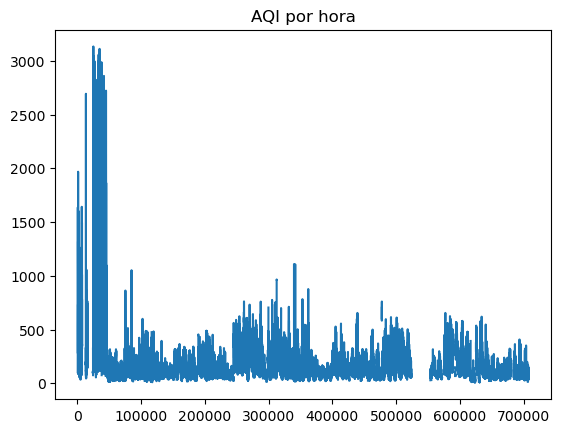

In [3]:
ciudad_hora.info()
ciudad_hora['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: title={'center': 'AQI por hora'}>

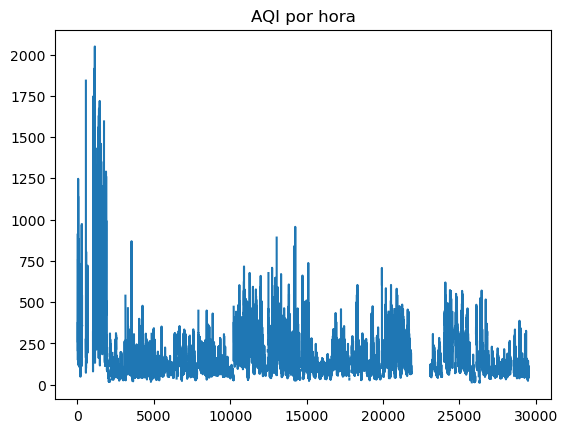

In [4]:
ciudad_dia.info()
ciudad_dia['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


<Axes: title={'center': 'AQI por hora'}>

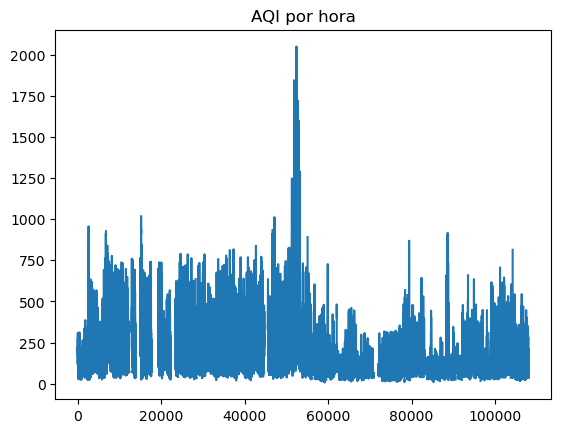

In [5]:
estacion_hora.info()
estacion_hora['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


<Axes: title={'center': 'AQI por hora'}>

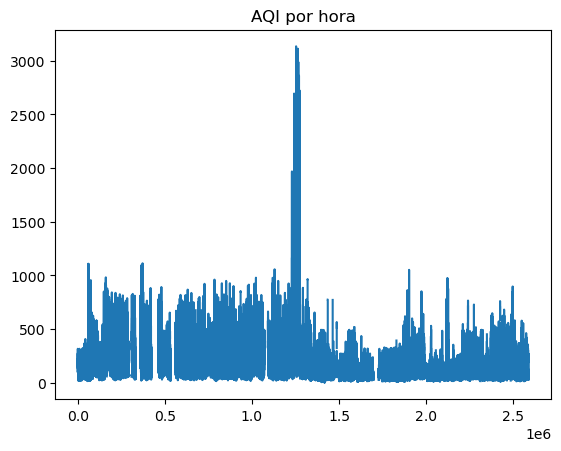

In [6]:
estacion_dia.info()
estacion_dia['AQI'].plot(title = "AQI por hora")

In [7]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


<h2 style="text-align: left; color: red;">Distribución de los contaminantes pre-imputación/limpieza</h2>

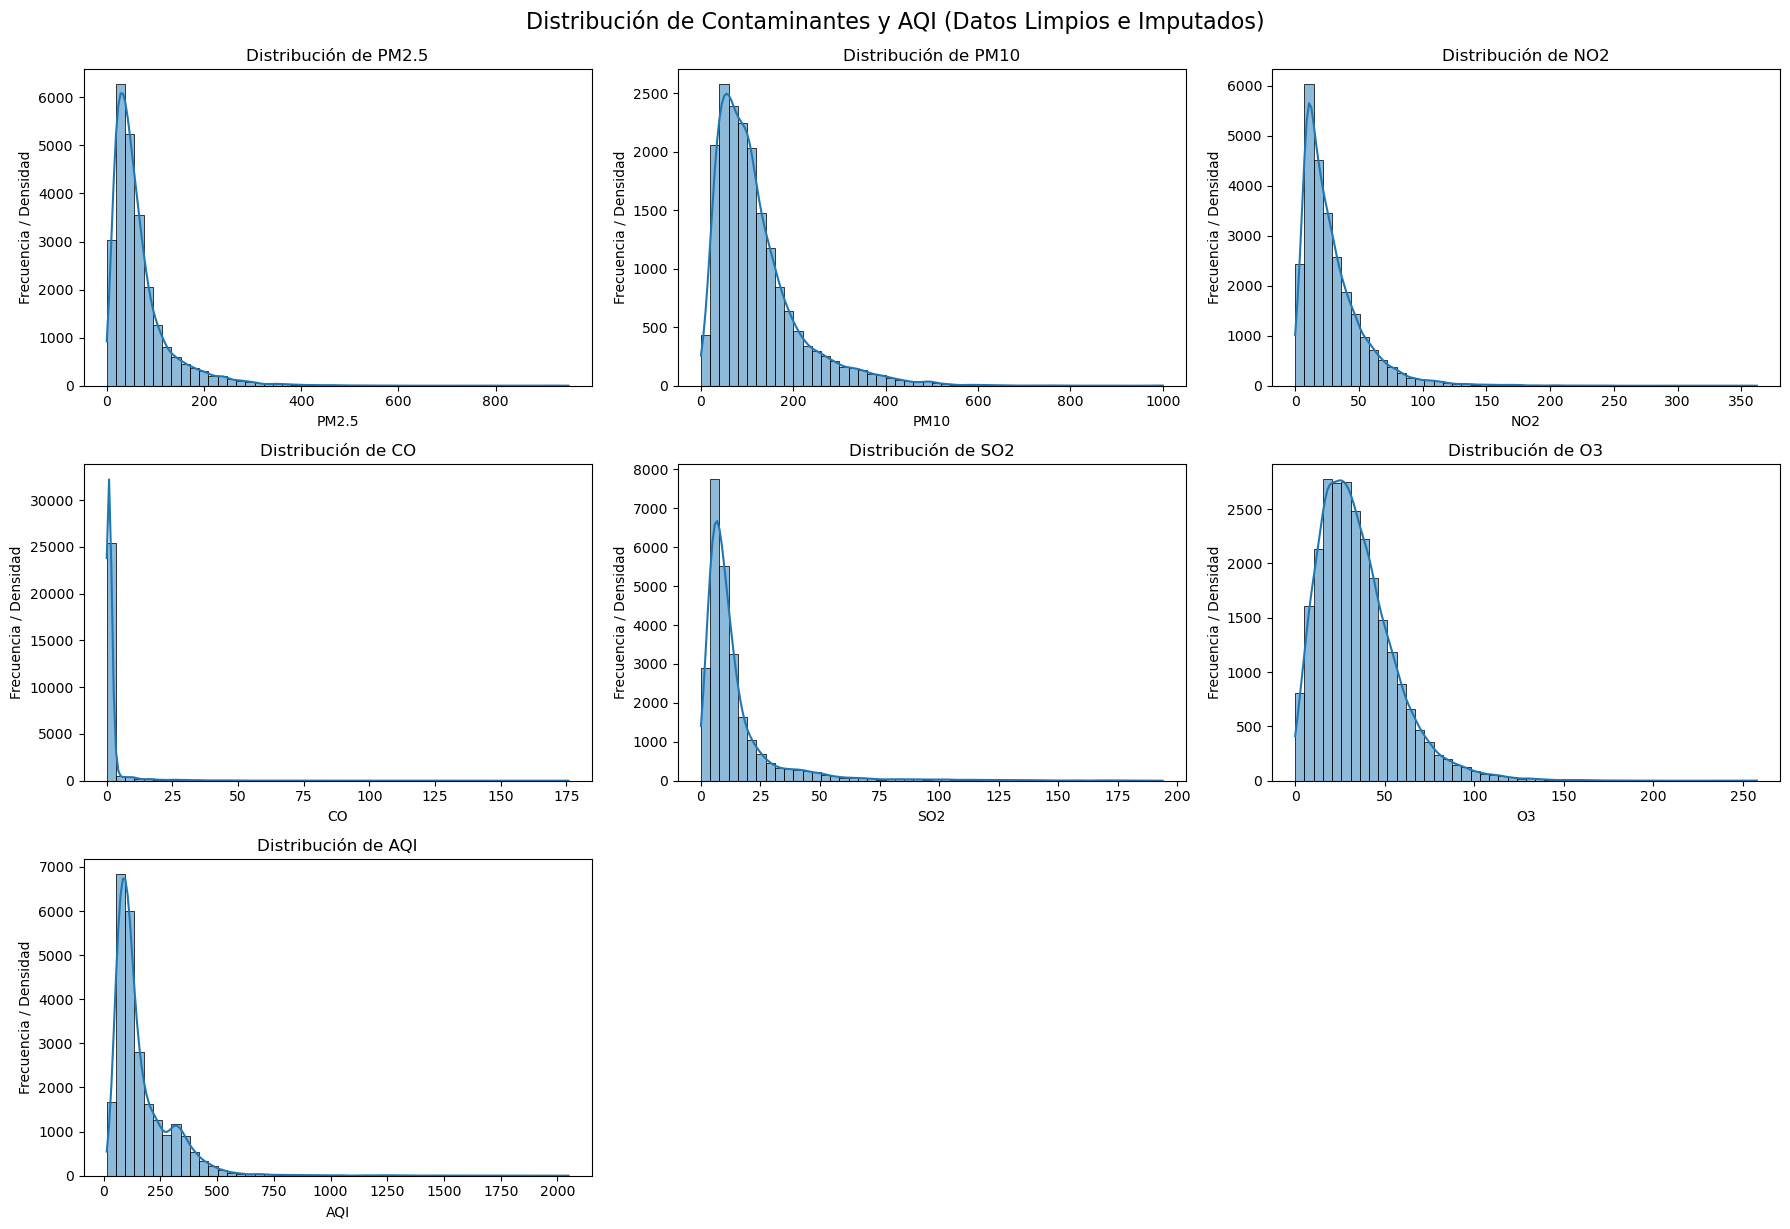

In [ ]:
# Variables de contaminantes elegidos.
variables = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

# Creacion del grafico de distribución de los contaminantes.
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(
        data=ciudad_dia,
        x=var,
        kde=True,
        bins=50
    )
    
    plt.xlabel(var)
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Distribución de {var}')

plt.tight_layout()
plt.suptitle('Distribución de Contaminantes y AQI (Datos Limpios e Imputados)', fontsize=16, y=1.02)

plt.show()

<h2 style="text-align: left; color: red;">Análisis de NaNs</h2>

In [ ]:
def analizar_nans_por_columna_y_total(nombre_archivo_csv):
    """
    Carga el archivo CSV para buscar en las filas si algunos de los contaminantes o el AQI,
    poseen valores nulos y determinar el total encontrado. 
    
    Parametros:
    nombre_archivo_csv: str
        Nombre del archivo csv.
    
    Retorna:
    dict:
        Diccionario con los datos de los valores nulos identificados por columna y el total de filas afectadas.
    """
    try:
        df = pd.read_csv(nombre_archivo_csv)
    except FileNotFoundError:
        return f"Error: El archivo '{nombre_archivo_csv}' no fue encontrado."

    columnas_a_verificar = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']
    columnas_existentes = [col for col in columnas_a_verificar if col in df.columns]
    
    if not columnas_existentes:
        return "No se encontraron las columnas de los contaminantes y el AQI."

    total_filas = len(df)
    
    print(f"Análisis de valores nulos en '{nombre_archivo_csv}' ({total_filas} filas totales)")
    print("-" * 43)
    
    nan_counts = df[columnas_existentes].isna().sum()
    nan_percentages = (nan_counts / total_filas) * 100
    
    reporte_df = pd.DataFrame({
        'Total de NaNs': nan_counts,
        'Porcentaje de NaNs (%)': nan_percentages
    })
    
    reporte_df = reporte_df.sort_values(by='Porcentaje de NaNs (%)', ascending=False)
    reporte_df['Porcentaje de NaNs (%)'] = reporte_df['Porcentaje de NaNs (%)'].map('{:.2f}%'.format)
    
    print("--- Información por Columna ---")
    print(reporte_df)
    
    # 2. Análisis del Total de Filas Afectadas
    # .any(axis=1) devuelve True para cada fila que tiene al menos un NaN en las columnas seleccionadas
    filas_con_algun_nan = df[columnas_existentes].isna().any(axis=1)
    total_filas_afectadas = filas_con_algun_nan.sum()
    porcentaje_filas_afectadas = (total_filas_afectadas / total_filas) * 100
    
    print("-" * 52)
    print("--- Resumen ---")
    print(f"Total de filas con al menos un valor nulo: {total_filas_afectadas}")
    print(f"Porcentaje de filas afectadas:      {porcentaje_filas_afectadas:.2f}%")
    print("-" * 52)
    
    return {
        'desglose_por_columna': reporte_df,
        'total_filas_afectadas': total_filas_afectadas,
        'porcentaje_filas_afectadas': porcentaje_filas_afectadas
    }


resultados_analisis = analizar_nans_por_columna_y_total("Archivos No Imputados/city_day.csv")

Análisis de valores NaN en 'Archivos No Imputados/city_day.csv' (29531 filas en total)
-------------------------------------------------------
--- Desglose por Columna ---
       Total de NaNs Porcentaje de NaNs (%)
PM10           11140                 37.72%
NH3            10328                 34.97%
AQI             4681                 15.85%
PM2.5           4598                 15.57%
O3              4022                 13.62%
SO2             3854                 13.05%
NO2             3585                 12.14%
NO              3582                 12.13%
CO              2059                  6.97%

-------------------------------------------------------
--- Resumen General ---
Total de filas con al menos un NaN: 15186
Porcentaje de filas afectadas:      51.42%
-------------------------------------------------------


<h2 style="text-align: left; color: red;">Preprocesamiento de datos</h2>

<h3 style="text-align: left; color: red;">Función con los rangos del AQI</h3>

In [ ]:
def obtener_rangos_aqi():
    '''
    Obtiene los rangos de AQI quemados para cada contaminante segun los valores establecidos por la CPCB de la India.
    
    Retorna:
    dict:
        Valores de los rangos del AQI para cada contaminante. 
    '''
    return {'PM2.5':[(0,30,0,50),(31,60,51,100),(61,90,101,200),(91,120,201,300),(121,250,301,400),(251,500,401,500)],
            'PM10':[(0,50,0,50),(51,100,51,100),(101,250,101,200),(251,350,201,300),(351,430,301,400),(431,1000,401,500)],
            'NO2':[(0,40,0,50),(41,80,51,100),(81,180,101,200),(181,280,201,300),(281,400,301,400),(401,1000,401,500)],
            'O3':[(0,50,0,50),(51,100,51,100),(101,168,101,200),(169,208,201,300),(209,748,301,400),(749,1500,401,500)],
            'CO':[(0,1.0,0,50),(1.1,2.0,51,100),(2.1,10.0,101,200),(10.1,17.0,201,300),(17.1,34.0,301,400),(34.1,100,401,500)],
            'SO2':[(0,40,0,50),(41,80,51,100),(81,380,101,200),(381,800,201,300),(801,1600,301,400),(1601,3200,401,500)],
            'NH3':[(0,200,0,50),(201,400,51,100),(401,800,101,200),(801,1200,201,300),(1201,1800,301,400),(1801,3600,401,500)]}

<h3 style="text-align: left; color: red;">Función para el calculo del subíndice del AQI</h3>

In [ ]:
def calcular_subindice_aqi(concentracion, nombre_contaminante, rangos):
    '''
    Calcula el subíndice del AQI para la concentracion de un contaminante.
    
    Parametros:
    concentracion: float
        Valor de la concentración del contaminante
    nombre_contaminante: str
        Nombre del contaminante
    rangos: dict
        Diccionario con los rangos de contaminante del AQI.
    
    Retorna:
    limite_inf_aqi: float 
        Subíndice calculado del AQI.
    np.nan:
        Si no se logro calcular el AQI.
    '''
    if nombre_contaminante not in rangos or pd.isna(concentracion): 
        return np.nan
    for limite_inf_conc, limite_sup_conc, limite_inf_aqi, limite_sup_aqi in rangos[nombre_contaminante]:
        if limite_inf_conc <= concentracion <= limite_sup_conc:
            if limite_sup_conc == limite_inf_conc: 
                return limite_inf_aqi
            return ((limite_sup_aqi-limite_inf_aqi)/(limite_sup_conc-limite_inf_conc))*(concentracion-limite_inf_conc)+limite_inf_aqi
    ultimo_rango = rangos[nombre_contaminante][-1]
    if concentracion > ultimo_rango[1]: 
        return float(ultimo_rango[3])
    return np.nan


<h3 style="text-align: left; color: red;">Función para calcular el AQI</h3>

In [ ]:

def calcular_aqi_final(fila, columnas_df, rangos_aqi):
    '''
    Calcula el valor del AQI para cada fila de valores con los subindices obtenidos.
    
    Parametros:
    fila: dataframe
        Fila del DataFrame a calcular el AQI.
    columnas_df: Index
        Columnas de los valores a evaluar.
    rangos_aqi: dict
        Rangos del AQI para cada contaminante.

    Retorna:
    max(subindices): float
        Valor mas alto de los subíndices calculados.
    np.nan:
        Si no se logro calcular el AQI retorna nulo.
    '''
    subindices = [calcular_subindice_aqi(fila.get(contaminante), contaminante, rangos_aqi) for contaminante in rangos_aqi if contaminante in columnas_df]
    subindices = [s for s in subindices if not pd.isna(s)]
    hay_particulado = not (pd.isna(fila.get('PM2.5',np.nan)) and pd.isna(fila.get('PM10',np.nan)))
    if len(subindices) >= 3 and hay_particulado: 
        return max(subindices)
    return np.nan


<h3 style="text-align: left; color: red;">Función para cargar los archivos y iniciar el calculo del AQI</h3>

In [ ]:

def cargar_y_crear_valor_real(ruta_archivo, rangos):
    '''
    Carga los datos almacenado en el csv y llama a las funciones que calculan el AQI.
    
    Parametros:
    ruta_archivo: str
        Ruta al archivo CSV.
    rangos: dict
        Rangos de AQI para cada contaminante.

    Retorna:
    datos: pd.DataFrame
        Archivo con el AQI calculado mediantes los indices.
    '''
    print("--- 1. Cargando datos y creando 'Valor Real' ---")
    inicio_tiempo = time.time()
    
    datos = pd.read_csv(ruta_archivo)
    datos['Date'] = pd.to_datetime(datos['Date'], errors='coerce')
    datos = datos.sort_values(by=['Date','City']).reset_index(drop=True)
    datos['AQI_Calculado'] = datos.apply(lambda fila: calcular_aqi_final(fila, datos.columns, rangos), axis=1)
    
    filas_iniciales = len(datos)
    datos.dropna(subset=['AQI_Calculado'], inplace=True)
    print(f"Se eliminaron {filas_iniciales-len(datos)} filas sin un AQI válido.")
    datos.rename(columns={'AQI_Calculado': 'AQI'}, inplace=True)
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return datos


<h3 style="text-align: left; color: red;">Función para dividir los datos de forma cronológica</h3>

In [ ]:

def dividir_datos_cronologicamente(datos):
    '''
    Divide los datos de forma cronologica separando los datos en un 80% para el  entrenamiento y un 20% para las pruebas.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame con los datos del AQI calculado.

    Retorna:
    datos_entrenamiento: pd.DataFrame
        DataFrame con el 80% de los datos para el entrenamiento.
    datos_prueba: pd.DataFrame
        DataFrame con el 20% de los datos para las pruebas.
    '''
    print("\n--- 2. Dividiendo datos (80/20 cronológico) ---")
    inicio_tiempo = time.time()
    
    datos_entrenamiento, datos_prueba = train_test_split(datos, test_size=0.2, shuffle=False)
    print(f"División: {len(datos_entrenamiento)} entrenamiento, {len(datos_prueba)} prueba.")
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return datos_entrenamiento, datos_prueba


<h3 style="text-align: left; color: red;">Función para separar las variables independientes del AQI</h3>

In [ ]:

def separar_caracteristicas_y_objetivo(datos_entrenamiento, datos_prueba, caracteristicas, objetivo):
    '''
    Separa los variables independientes X y dependientes y, de los datos de entrenamiento y prueba.
    
    Parametros:
    datos_entrenamiento: pd.DataFrame
        DataFrame con el 80% de los datos para el entrenamiento.
    datos_prueba: pd.DataFrame
        DataFrame con el 20% de los datos para las pruebas.
    caracteristicas: list
        Lista de las variables independientes de los contaminantes.
    objetivo: str
        Columna de la variable dependiente.

    Retorna:
    X_entrenamiento: pd.DataFrame
        DataFrame con las variables independientes del entrenamiento.
    y_entrenamiento: pd.Series
        Serie con la variable dependiente del entrenamiento.
    X_prueba: pd.DataFrame
        DataFrame con las variables independientes de la prueba.    
    y_prueba: pd.Series
        Serie con la variable dependiente de la prueba.
    '''
    print("\n--- 3. Separando Características (X) y Objetivo (y) ---")
    inicio_tiempo = time.time()
    
    X_entrenamiento = datos_entrenamiento[caracteristicas]
    y_entrenamiento = datos_entrenamiento[objetivo]
    X_prueba = datos_prueba[caracteristicas]
    y_prueba = datos_prueba[objetivo]
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return X_entrenamiento, y_entrenamiento, X_prueba, y_prueba


<h3 style="text-align: left; color: red;">Función para visualizar los valores NaN</h3>

In [ ]:

def visualizar_valores_nan(datos, titulo, variables_principales):
    '''
    Grafica para visualizar la cantidad de valores NaN que existen por columna en las variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    titulo: str
        Título del gráfico
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print(f"\n--- Análisis de valores NaN: {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_a_analizar = [col for col in variables_principales if col in datos.columns]
    
    valores_nulos = datos[columnas_a_analizar].isnull().sum()
    valores_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)
    
    if valores_nulos.empty:
        print("No existen valores NaN en las variables principales.")
        return
    
    print(valores_nulos)
    plt.figure(figsize=(12, 6))
    valores_nulos.plot(kind='bar', color=sns.color_palette('viridis', len(valores_nulos)))
    plt.title(f'Valores NaN por Columna ({titulo})', fontsize=16)
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de NaN')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar las tendencias temporales</h3>

In [ ]:

def visualizar_tendencias_temporales(datos, variables_principales):
    '''
    Grafica para visualizar las tendencias temporales con un promedio mensual en las variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print("\n--- Visualizando Tendencias Temporales (Promedio Mensual) ---")
    inicio_tiempo = time.time()
    
    columnas_visualizar = []
    
    if 'AQI' in datos.columns:
        columnas_visualizar.append('AQI')
    
    for col in variables_principales:
        if col in datos.columns:
            columnas_visualizar.append(col)
    
    datos_temp = datos[['Date'] + columnas_visualizar].copy()
    datos_mensuales = datos_temp.set_index('Date').resample('M').mean()
    
    n_vars = len(columnas_visualizar)
    fig, axes = plt.subplots(n_vars, 1, figsize=(20, 4*n_vars), sharex=True)
    
    if n_vars == 1:
        axes = [axes]
    
    unidades = {
        'AQI': 'Índice AQI',
        'PM2.5': 'µg/m³',
        'PM10': 'µg/m³',
        'NO': 'µg/m³',
        'NO2': 'µg/m³',
        'NH3': 'µg/m³',
        'CO': 'mg/m³',
        'SO2': 'µg/m³',
        'O3': 'µg/m³'
    }
    
    for i, columna in enumerate(columnas_visualizar):
        axes[i].plot(datos_mensuales.index, datos_mensuales[columna], 
                    linewidth=2, color='steelblue')
        axes[i].set_title(f'Tendencia Temporal: {columna}', fontsize=14, fontweight='bold')
        
        unidad = unidades.get(columna, 'Concentración')
        axes[i].set_ylabel(f'{columna}\n({unidad})', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        
        axes[i].tick_params(axis='y', labelsize=10)
        axes[i].tick_params(axis='x', labelsize=10)
    
    axes[-1].set_xlabel('Fecha', fontsize=12, fontweight='bold')
    
    plt.suptitle('Tendencias Temporales (Promedio Mensual)', fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los datos antes de detectar los valores atípicos</h3>

In [ ]:

def visualizar_datos_antes_deteccion_atipicos(datos, columna_x, columna_y, titulo):
    '''
    Gráfica para visualizar los datos antes de detectar los valores de atípicos.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    columna_x: str
        Nombre de la columna para el eje X
    columna_y: str
        Nombre de la columna para el eje Y
    titulo: str
        Título del gráfico

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=datos, x=columna_x, y=columna_y, alpha=0.7, color='royalblue')
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.xlabel(f'{columna_x} (µg/m³)', fontsize=12, fontweight='bold')
    plt.ylabel(f'{columna_y} (µg/m³)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los datos despues de detectar los valores atípicos</h3>

In [ ]:

def visualizar_datos_despues_deteccion_atipicos(datos, columna_x, columna_y, etiquetas, titulo):
    '''
    Grafica para visualizar los datos después de detectar los valores atípicos.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    columna_x: str
        Nombre de la columna para el eje X
    columna_y: str
        Nombre de la columna para el eje Y
    etiquetas: array
        Etiquetas para diferenciar valores atípicos (-1) de los normales (1)    
    titulo: str
        Título del gráfico
    
    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    datos_grafico = datos.copy()
    datos_grafico['Tipo'] = ['Atípico' if etiqueta == -1 else 'Normal' for etiqueta in etiquetas]
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=datos_grafico, x=columna_x, y=columna_y, hue='Tipo', style='Tipo', 
                    palette={'Normal':'royalblue', 'Atípico':'orangered'}, alpha=0.7)
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.xlabel(f'{columna_x} (µg/m³)', fontsize=12, fontweight='bold')
    plt.ylabel(f'{columna_y} (µg/m³)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Clasificación', title_fontsize=12, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los el mapa de calor de correlación</h3>

In [ ]:

def visualizar_mapa_correlaciones(datos, titulo, variables_principales):
    '''
    Gráfica para visualizar el mapa de calor de correlacion entre variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    titulo: str
        Título del gráfico
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_disponibles = [col for col in variables_principales if col in datos.columns]
    
    if len(columnas_disponibles) < 2:
        print("No existen suficientes variables principales para crear el mapa de correlaciones.")
        return
    
    matriz_correlacion = datos[columnas_disponibles].corr()
    
    plt.figure(figsize=(12, 10))
    mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)
    
    sns.heatmap(matriz_correlacion, mask=mascara, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f',
                vmin=-1, vmax=1)
    plt.title(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar la relación de las variables con el AQI</h3>

In [ ]:

def visualizar_relacion_variables_con_aqi(datos, variables_principales, columna_objetivo, titulo):
    '''
    Gráfica para visualizar las relaciones entre las variables principales y AQI con gráficos de dispersión.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    variables_principales: list
        Lista de variables principales a analizar
    columna_objetivo: str
        Nombre de la columna objetivo
    titulo: str
        Título de la gráfica

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_disponibles = [col for col in variables_principales if col in datos.columns and datos[col].dtype in ['int64', 'float64']]
    
    if not columnas_disponibles:
        print("No se encontraron variables principales numéricas para visualizar.")
        return
    
    numero_columnas = 3
    numero_filas = (len(columnas_disponibles) + numero_columnas - 1) // numero_columnas
    
    fig, axes = plt.subplots(numero_filas, numero_columnas, figsize=(18, 6*numero_filas))
    if numero_filas == 1:
        axes = axes.reshape(1, -1)
    
    unidades = {
        'PM2.5': 'µg/m³', 'PM10': 'µg/m³', 'NO': 'µg/m³', 'NO2': 'µg/m³',
        'NH3': 'µg/m³', 'CO': 'mg/m³', 'SO2': 'µg/m³', 'O3': 'µg/m³', 'AQI':'µg/m³'
    }
    
    for i, columna in enumerate(columnas_disponibles):
        fila = i // numero_columnas
        columna_idx = i % numero_columnas
        
        if numero_filas > 1:
            eje = axes[fila, columna_idx]
        else:
            eje = axes[columna_idx]
            
        sns.scatterplot(data=datos, x=columna, y=columna_objetivo, alpha=0.6, ax=eje, color='steelblue')
        eje.set_title(f'{columna} vs {columna_objetivo}', fontsize=12, fontweight='bold')
        
        unidad_x = unidades.get(columna, 'Concentración')
        eje.set_xlabel(f'{columna} ({unidad_x})', fontsize=10, fontweight='bold')
        eje.set_ylabel(f'{columna_objetivo} (Índice)', fontsize=10, fontweight='bold')
        eje.grid(True, alpha=0.3)
    
    for i in range(len(columnas_disponibles), numero_filas * numero_columnas):
        fila = i // numero_columnas
        columna_idx = i % numero_columnas
        if numero_filas > 1:
            axes[fila, columna_idx].set_visible(False)
        else:
            axes[columna_idx].set_visible(False)
    
    plt.suptitle(titulo, fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")
